<a href="https://colab.research.google.com/github/GalaAldebara/PCVK_IqbalMakmur/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama : Muhammad Iqbal Makmur Al-Muniri
## Kelas : TI-3H
## No Absen : 16
## NIM : 2241720099

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import glob

### 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini

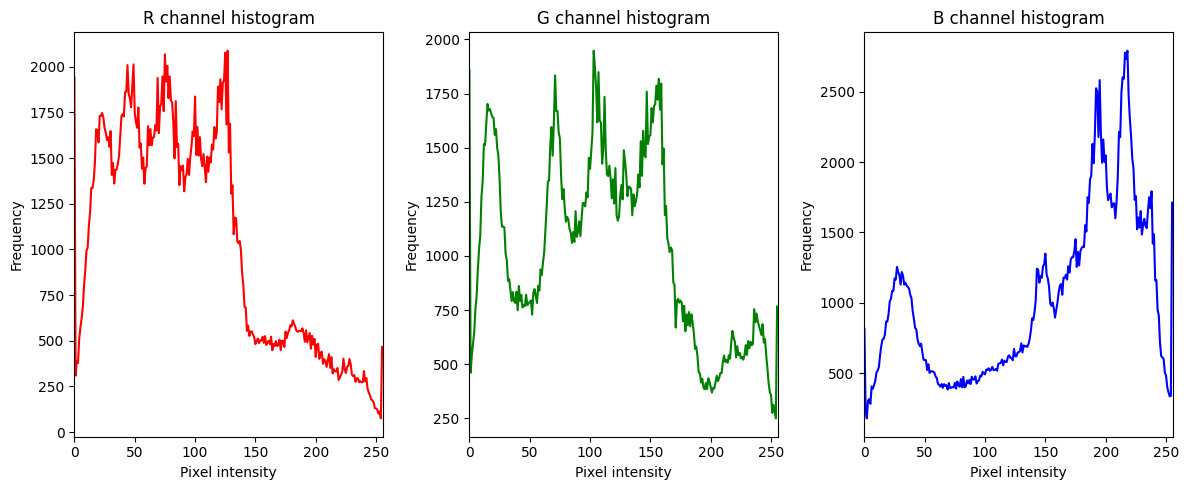

In [5]:
img_path = '/content/drive/MyDrive/Images/lena.jpg'
img = cv.imread(img_path)


channels = cv.split(img)

colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 5))

for i, color in enumerate(colors):
    hist = cv.calcHist([channels[i]], [0], None, [256], [0, 256])
    plt.subplot(1, 3, i+1)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f'{color.upper()} channel histogram')
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### 4. Setelah mengerjakan soal no.3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu "histogram". Bandingkan hasilnya. Apakah output muncul sama?

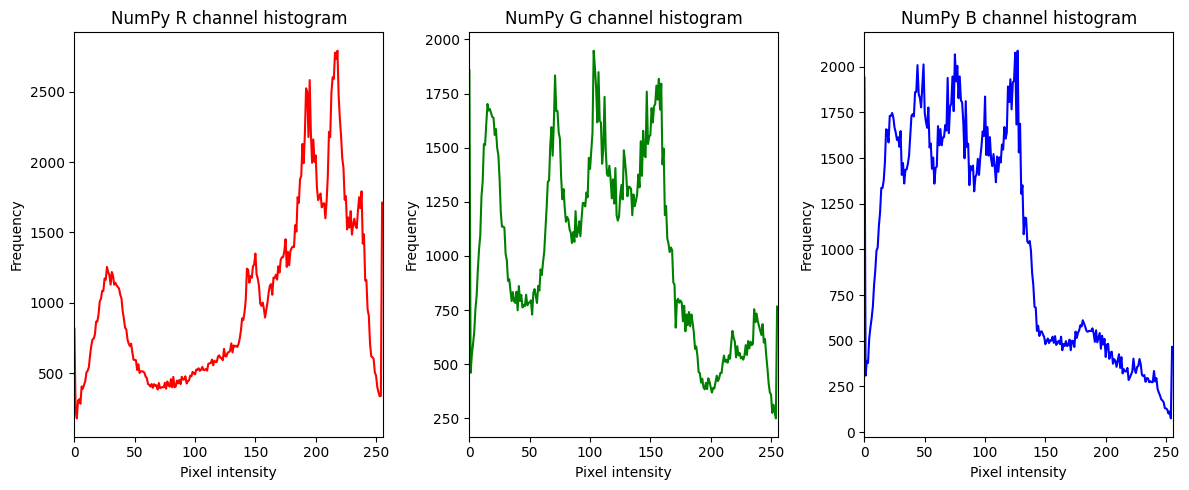

In [8]:
img_path = '/content/drive/MyDrive/Images/lena.jpg'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
channels = cv.split(img)

colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 5))

for i, color in enumerate(colors):
    hist, bins = np.histogram(channels[i].ravel(), bins=256, range=[0,256])
    plt.subplot(1, 3, i+1)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f'NumPy {color.upper()} channel histogram')
    plt.xlabel('Pixel intensity')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Pada nomor 3 menggunakan calchist dari OpenCV yang berfungsi untuk menghitung histogram secara langsung dari data gambar. sedangkan histogram dari numpy berfungsi untuk membagi data ke dalam bin yang ditentukan dan menghitung berapa banyak nilai yang masuk ke setiap bin. histogram numpy tidak memperhitungkan bobot atau strategi akumulasi yang berbeda, sehingga dapat menghasilkan interpretasi data yang sedikit berbeda.

### 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini:

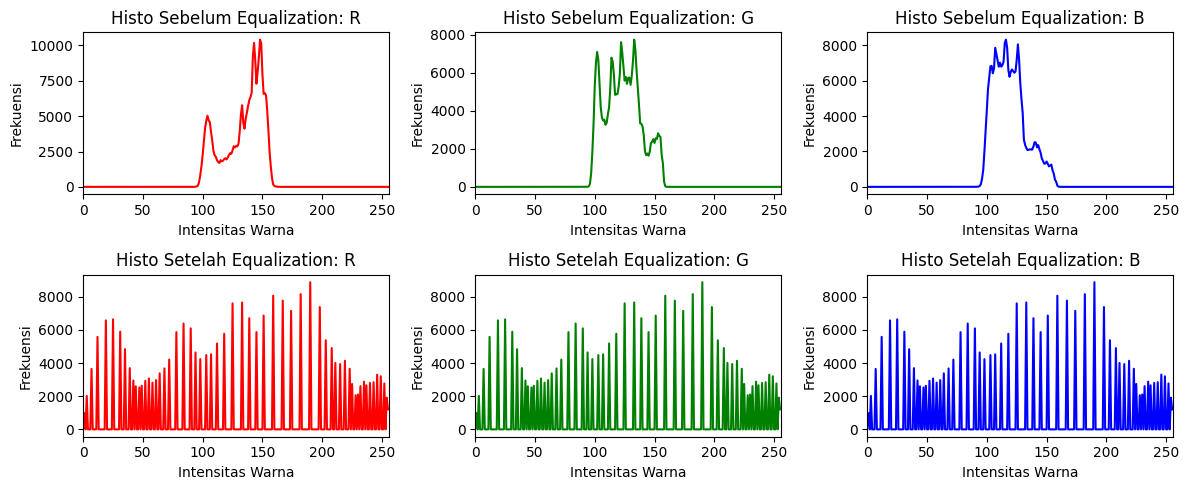

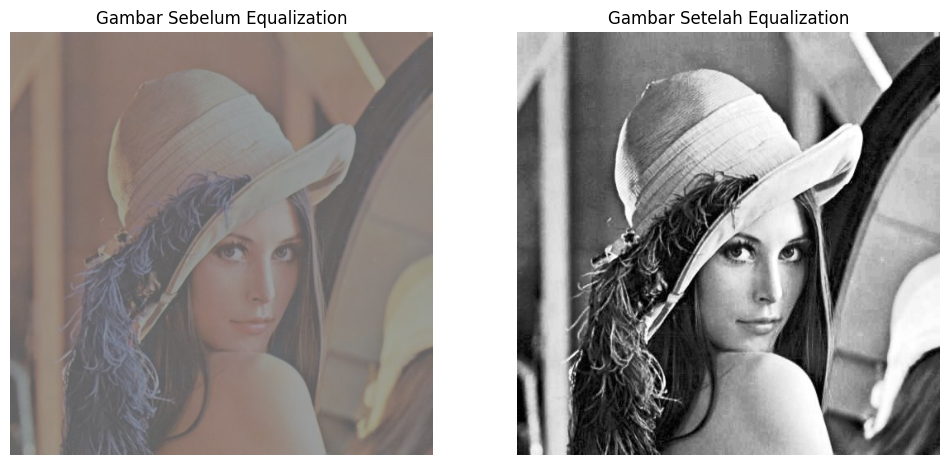

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Images/lena_lc.jpg'  # Pastikan ini adalah path yang benar
img = cv.imread(img_path)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

channels = cv.split(img)
colors = ('r', 'g', 'b')

plt.figure(figsize=(12, 5))

# Histogram before equalization
for i, color in enumerate(colors):
    hist = cv.calcHist([channels[i]], [0], None, [256], [0, 256])
    plt.subplot(2, 3, i+1)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f'Histo Sebelum Equalization: {color.upper()}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Frekuensi')

# Step 4: Perform histogram equalization on each channel
equalized_channels = []
for i in range(3):
    # Convert to grayscale for equalization
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    equalized = cv.equalizeHist(gray)
    equalized_channels.append(equalized)

# Merge equalized channels back into an image
equalized_image = cv.merge(equalized_channels)

# Step 5: Calculate histogram after histogram equalization
equalized_channels = cv.split(equalized_image)

for i, color in enumerate(colors):
    hist = cv.calcHist([equalized_channels[i]], [0], None, [256], [0, 256])
    plt.subplot(2, 3, i+4)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f'Histo Setelah Equalization: {color.upper()}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Frekuensi')

# Step 6: Show the histograms and the equalized image
plt.tight_layout()
plt.show()

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Sebelum Equalization')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Gambar Setelah Equalization')
plt.axis('off')
plt.show()




### 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu "equalizeHist". Bandingkan hasilnya. Apakah output muncul sama?

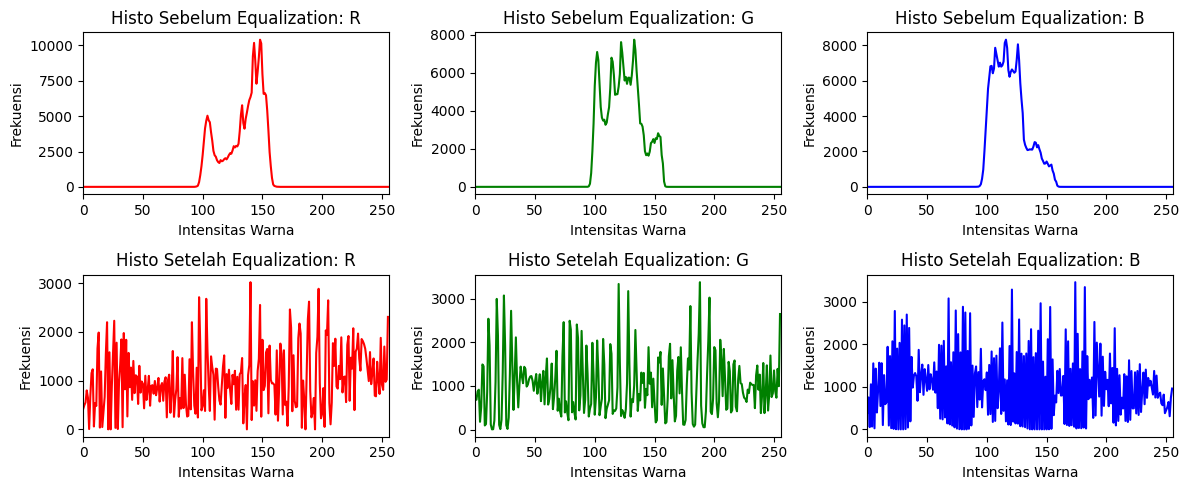

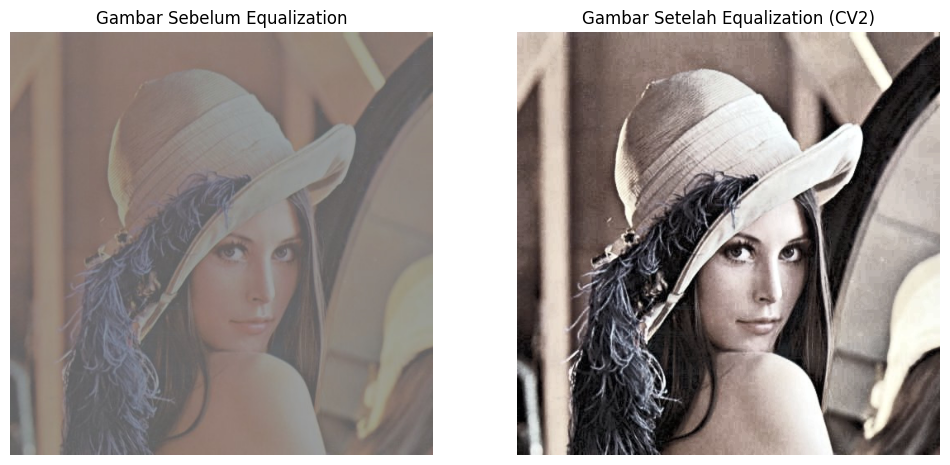

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
img_path = '/content/drive/MyDrive/Images/lena_lc.jpg'  # Pastikan ini adalah path yang benar
img = cv.imread(img_path)

# Step 2: Convert BGR to RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Step 3: Calculate histogram before histogram equalization
channels = cv.split(img)
colors = ('r', 'g', 'b')

plt.figure(figsize=(12, 5))

# Histogram before equalization
for i, color in enumerate(colors):
    hist = cv.calcHist([channels[i]], [0], None, [256], [0, 256])
    plt.subplot(2, 3, i+1)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f'Histo Sebelum Equalization: {color.upper()}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Frekuensi')

# Step 4: Perform histogram equalization using equalizeHist on the Y channel in YUV
# Convert to YUV color space
img_yuv = cv.cvtColor(img, cv.COLOR_RGB2YUV)

# Equalize the Y channel
img_yuv[:,:,0] = cv.equalizeHist(img_yuv[:,:,0])

# Convert back to RGB
equalized_image_cv2 = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)

# Step 5: Calculate histogram after histogram equalization
equalized_channels_cv2 = cv.split(equalized_image_cv2)

for i, color in enumerate(colors):
    hist = cv.calcHist([equalized_channels_cv2[i]], [0], None, [256], [0, 256])
    plt.subplot(2, 3, i+4)
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.title(f'Histo Setelah Equalization: {color.upper()}')
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Frekuensi')

# Step 6: Show the histograms and the equalized image
plt.tight_layout()
plt.show()

# Display the original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Sebelum Equalization')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image_cv2)
plt.title('Gambar Setelah Equalization (CV2)')
plt.axis('off')

plt.show()


Hasil dari equalizeHist memberikan peningkatan kontras yang lebih baik dibandingkan dengan metode equalization lainnya. equalizeHist dapat mengurangi masalah pencahayaan dan meningkatkan detail gambar dibandingkan dengan metode equalization manual.

### 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart dibawah ini! (Gunakan gambar lena.jpg)

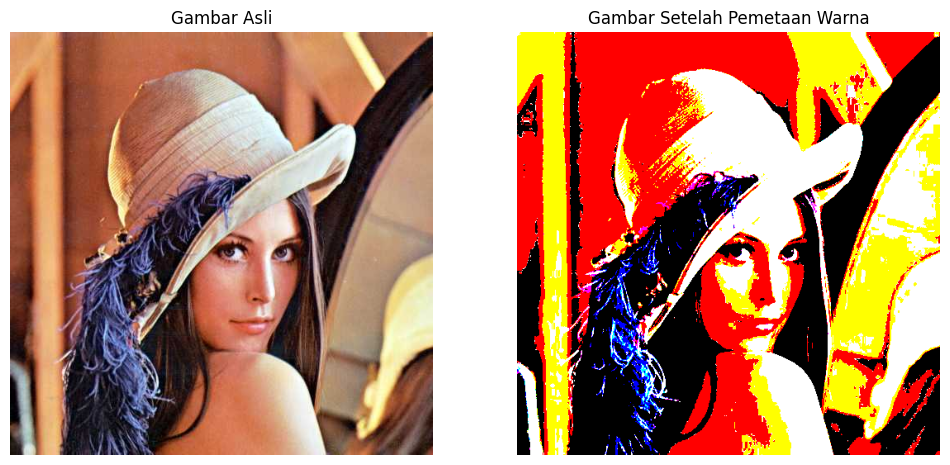

In [15]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Images/lena.jpg'
img = cv.imread(img_path)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Define color mapping (8 colors)
def color_mapping(pixel):
    r, g, b = pixel
    if r > 128 and g < 128 and b < 128:  # Red
        return [255, 0, 0]
    elif r < 128 and g > 128 and b < 128:  # Green
        return [0, 255, 0]
    elif r > 128 and g > 128 and b < 128:  # Yellow
        return [255, 255, 0]
    elif r < 128 and g < 128 and b > 128:  # Blue
        return [0, 0, 255]
    elif r < 128 and g > 128 and b > 128:  # Cyan
        return [0, 255, 255]
    elif r > 128 and g < 128 and b > 128:  # Magenta
        return [255, 0, 255]
    elif r < 128 and g < 128 and b < 128:  # Black
        return [0, 0, 0]
    else:  # White
        return [255, 255, 255]

# Create a new image for the mapped colors
mapped_image = np.zeros_like(img)


for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        mapped_image[i, j] = color_mapping(img[i, j])


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped_image)
plt.title('Gambar Setelah Pemetaan Warna')
plt.axis('off')

plt.show()


### 8. Lakukanlah proses dthering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

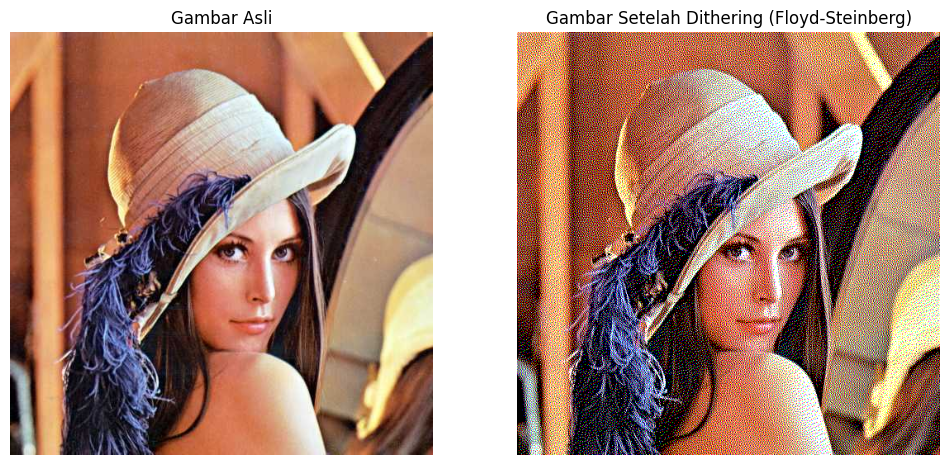

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Images/lena.jpg'
img = cv.imread(img_path)

# Floyd-Steinberg dithering for color images
def floyd_steinberg_dithering_color(image):
    h, w, c = image.shape
    dithered_image = np.zeros((h, w, c), dtype=np.uint8)

    # Iterate through each pixel in the image
    for y in range(h):
        for x in range(w):
            for channel in range(c):  # Apply dithering for each color channel
                old_pixel = image[y, x, channel]
                # Quantize to the nearest color (0 or 255)
                new_pixel = 255 * round(old_pixel / 255)
                dithered_image[y, x, channel] = new_pixel
                quant_error = old_pixel - new_pixel

                # Distribute the error to neighboring pixels
                if x + 1 < w:
                    image[y, x + 1, channel] = np.clip(image[y, x + 1, channel] + quant_error * 7 / 16, 0, 255)
                if x - 1 >= 0 and y + 1 < h:
                    image[y + 1, x - 1, channel] = np.clip(image[y + 1, x - 1, channel] + quant_error * 3 / 16, 0, 255)
                if y + 1 < h:
                    image[y + 1, x, channel] = np.clip(image[y + 1, x, channel] + quant_error * 5 / 16, 0, 255)
                if x + 1 < w and y + 1 < h:
                    image[y + 1, x + 1, channel] = np.clip(image[y + 1, x + 1, channel] + quant_error * 1 / 16, 0, 255)

    return dithered_image

# Apply dithering
dithered_image_color = floyd_steinberg_dithering_color(img.copy())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_image_color, cv.COLOR_BGR2RGB))
plt.title('Gambar Setelah Dithering (Floyd-Steinberg)')
plt.axis('off')

plt.show()


### 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

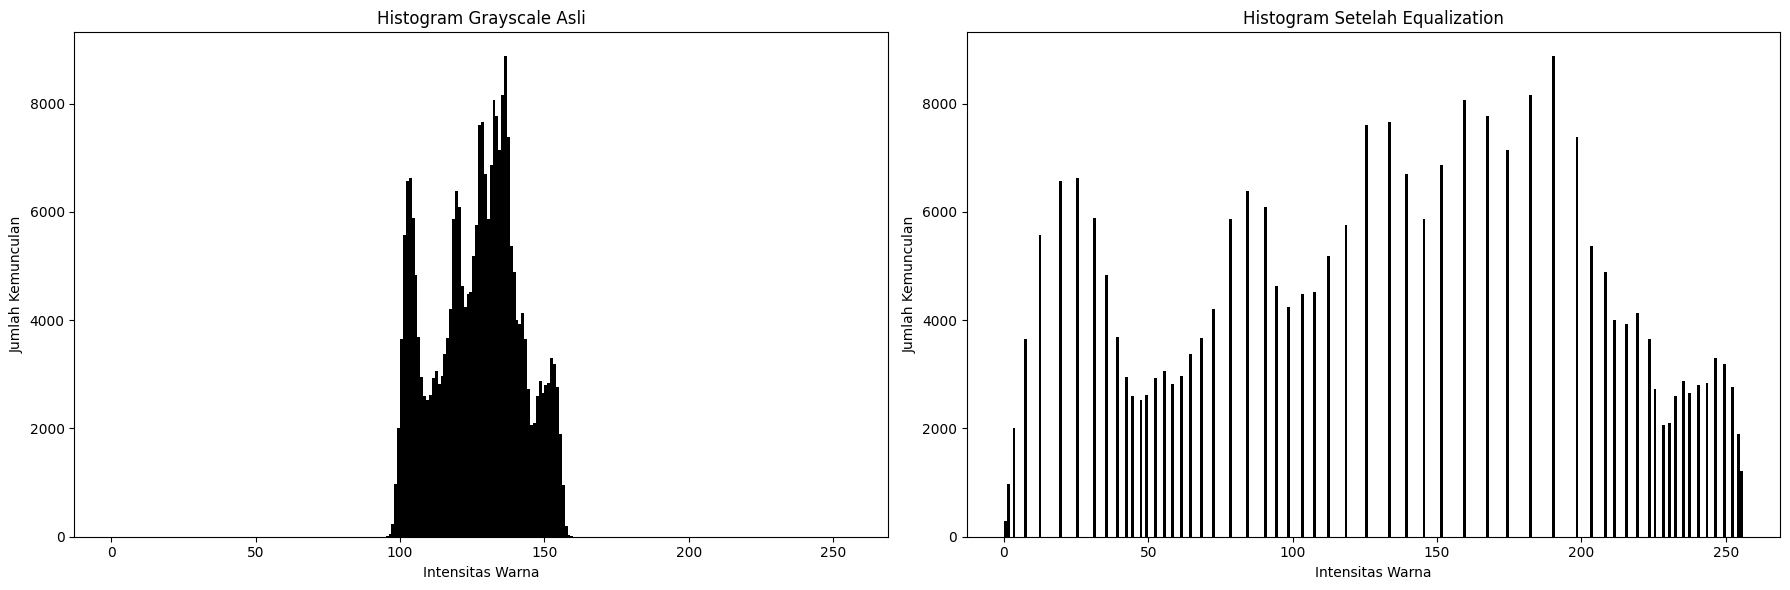

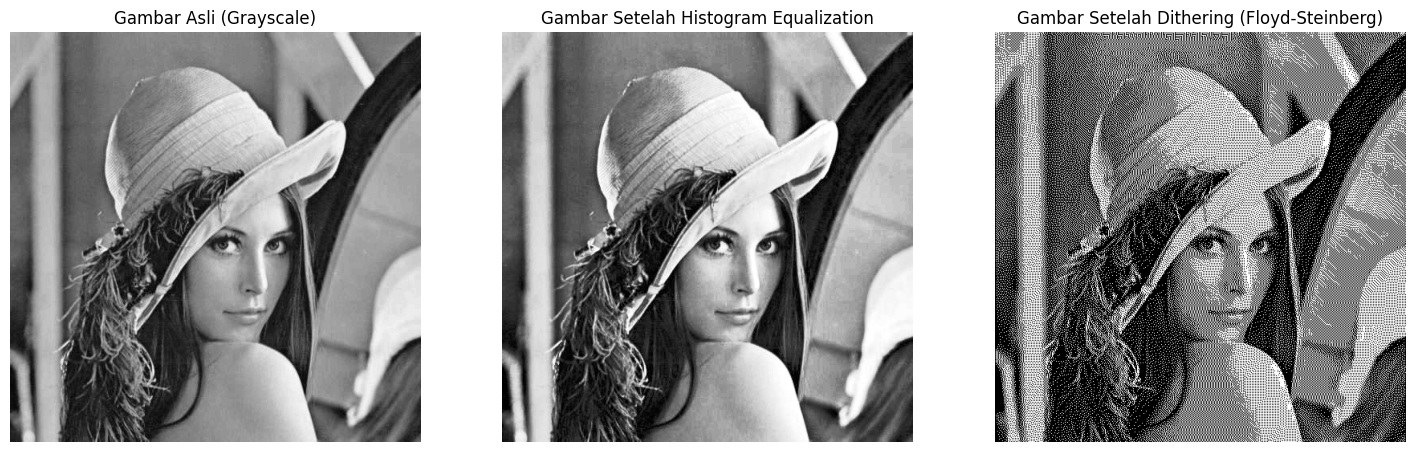

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/Images/lena_lc.jpg'
img = cv.imread(img_path)
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

equalized_img = cv.equalizeHist(gray_img)

# Floyd-Steinberg dithering for the equalized image
def floyd_steinberg_dithering(image):
    h, w = image.shape
    dithered_image = np.zeros_like(image)

    for y in range(h):
        for x in range(w):
            old_pixel = image[y, x]
            new_pixel = 255 * (old_pixel // 255)
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            # Distribute the error to neighboring pixels
            if x + 1 < w:
                image[y, x + 1] = np.clip(image[y, x + 1] + quant_error * 7 / 16, 0, 255)
            if x - 1 >= 0 and y + 1 < h:
                image[y + 1, x - 1] = np.clip(image[y + 1, x - 1] + quant_error * 3 / 16, 0, 255)
            if y + 1 < h:
                image[y + 1, x] = np.clip(image[y + 1, x] + quant_error * 5 / 16, 0, 255)
            if x + 1 < w and y + 1 < h:
                image[y + 1, x + 1] = np.clip(image[y + 1, x + 1] + quant_error * 1 / 16, 0, 255)

    return dithered_image

# Apply dithering
dithered_image = floyd_steinberg_dithering(equalized_img.copy())

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Grayscale Asli')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 2, 2)
plt.hist(equalized_img.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram Setelah Equalization')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Gambar Asli (Grayscale)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Gambar Setelah Histogram Equalization')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dithered_image, cmap='gray')
plt.title('Gambar Setelah Dithering (Floyd-Steinberg)')
plt.axis('off')

plt.show()
